In [2]:
import pandas as pd
import io
from google.colab import files
uploaded = files.upload()

Saving Time_series_analysis_and_forecast_DATASET.csv to Time_series_analysis_and_forecast_DATASET.csv


In [63]:
df = pd.read_csv(io.BytesIO(uploaded['Time_series_analysis_and_forecast_DATASET.csv']))
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FullDate   92016 non-null  object 
 1   Tmax       92016 non-null  float64
 2   SysLoad    92016 non-null  float64
 3   GasPrice   92016 non-null  float64
 4   ElecPrice  92016 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.5+ MB


In [64]:
#Clean date as index
df['FullDate'] = pd.to_datetime(df['FullDate'])
#df.set_index('FullDate',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   FullDate   92016 non-null  datetime64[ns]
 1   Tmax       92016 non-null  float64       
 2   SysLoad    92016 non-null  float64       
 3   GasPrice   92016 non-null  float64       
 4   ElecPrice  92016 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 3.5 MB


In [23]:
'''import matplotlib.pyplot as plt
import numpy as np
#Plot the passengers based on time
plt.figure(figsize=(10,6))
plt.plot(df.FullDate, df.ElecPrice, '--', marker='*', )
plt.grid()
plt.xlabel('Year')
plt.ylabel('ELectricity Price')'''

"import matplotlib.pyplot as plt\nimport numpy as np\n#Plot the passengers based on time\nplt.figure(figsize=(10,6))\nplt.plot(df.FullDate, df.ElecPrice, '--', marker='*', )\nplt.grid()\nplt.xlabel('Year')\nplt.ylabel('ELectricity Price')"

In [65]:
df.drop(columns=['Tmax', 'SysLoad', 'GasPrice'], inplace=True)
#Rename columns
#df.rename(columns={'FullDate': 'ds', 'ElecPrice':'y'}, inplace=True)
df.columns = ['ds', 'y']
df.head()

,ds,y
0,2010-09-01 00:00:00,23.710
1,2010-09-01 01:00:00,22.635
2,2010-09-01 02:00:00,22.565
3,2010-09-01 03:00:00,18.910
4,2010-09-01 04:00:00,18.030


In [19]:
#Remove missing values
df.isnull().sum()

ds    0
y     0
dtype: int64

In [27]:
#Remove outliers
df=df[(df.ds>df.ds.quantile(.05)) & (df.ds<df.ds.quantile(.95))]

In [66]:
#Resample to daily data
df = df.resample('D', on='ds').sum()
#df.set_index('FullDate',inplace=True)
#df = df.resample('D').sum()

In [67]:
df.head()

,y
ds,
2010-09-01,2751.700
2010-09-02,570.810
2010-09-03,504.975
2010-09-04,502.275
2010-09-05,500.555


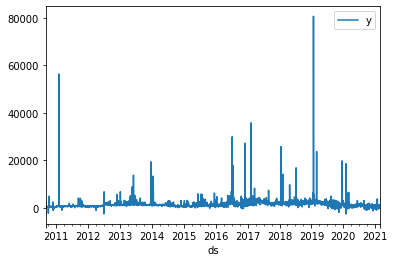

In [69]:
df.plot()

In [68]:
'''#ADF
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(df['ElecPrice'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used : {adf_result[3]}')
print('Critical Values:')
for k, v in adf_result[4].items():
  print(f' {k}: {v}')'''

"#ADF\nfrom statsmodels.tsa.stattools import adfuller\nadf_result = adfuller(df['ElecPrice'])\nprint(f'ADF Statistic: {adf_result[0]}')\nprint(f'p-value: {adf_result[1]}')\nprint(f'No. of lags used: {adf_result[2]}')\nprint(f'No. of observations used : {adf_result[3]}')\nprint('Critical Values:')\nfor k, v in adf_result[4].items():\n  print(f' {k}: {v}')"

In [70]:
#Divide data into train and test sets
df1 = df.copy()
df1.reset_index(inplace=True)
X_train = df1[:2757]
X_test = df1[2757:]


In [40]:
#Imports
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from prophet import Prophet


In [71]:
#Create and fit a model prophet
model = Prophet()
model.fit(X_train)
#model.fit(X_train[['ds', 'y']])

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4d_b3hfo/le05sb10.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4d_b3hfo/15tjrrzk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50252', 'data', 'file=/tmp/tmp4d_b3hfo/le05sb10.json', 'init=/tmp/tmp4d_b3hfo/15tjrrzk.json', 'output', 'file=/tmp/tmp4d_b3hfo/prophet_modelh3xhdgy4/prophet_model-20230131203515.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:35:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:35:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [72]:
#Make predictions
#predict for the next 10 months
future = model.make_future_dataframe(periods=len(X_test)) 
forecast = model.predict(future) 
#forecast.head()
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
#yhat is the prediction while yhat_lower and yhat_upper are the upper and lower boundaries

,ds,yhat,yhat_lower,yhat_upper
3829,2021-02-24,3446.060747,309.272732,6314.048517
3830,2021-02-25,3512.928139,636.784690,6418.431514
3831,2021-02-26,3279.749616,388.834560,6324.520702
3832,2021-02-27,2936.426367,175.162642,5953.074239
3833,2021-02-28,2848.375916,-190.495022,5831.210277


In [75]:
predictions = forecast[2757:]['yhat'].values
test_set = X_test['y'].values
mse = mean_squared_error(test_set, predictions)
mae = mean_absolute_error(test_set, predictions)
mape = mean_absolute_percentage_error(test_set, predictions)
print(f'mae: {mae}')
print(f'mse: {mse}')
print(f'mape: {mape}')


mae: 1731.9703063637687
mse: 10291665.047393445
mape: 5.447254323999416


In [76]:

np.sqrt(mean_squared_error(test_set, predictions))

3208.0625067777974

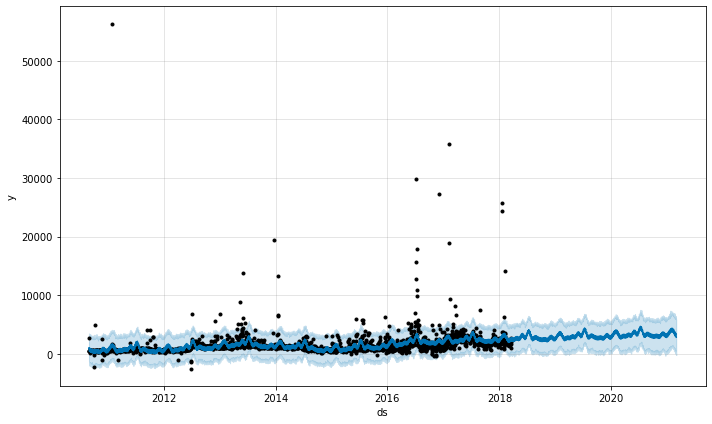

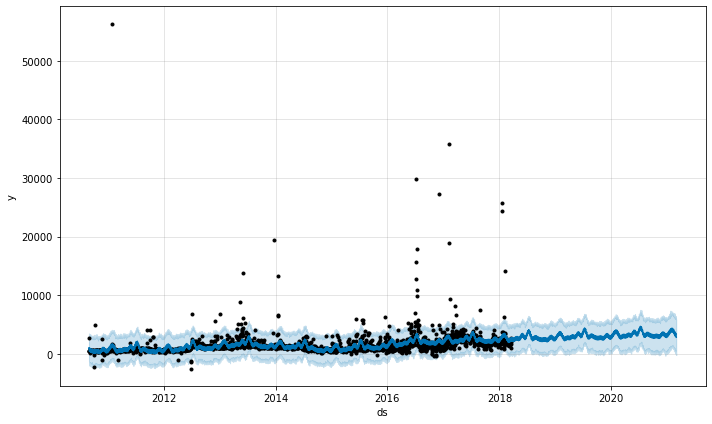

In [77]:
model.plot(forecast)

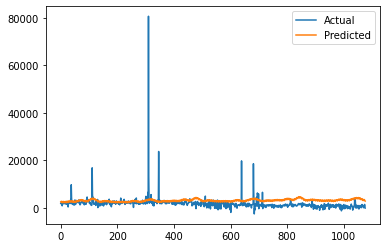

In [78]:
plt.plot(test_set, label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.show()